In [1]:
import pandas as pd

data = pd.read_csv("boston.csv")

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

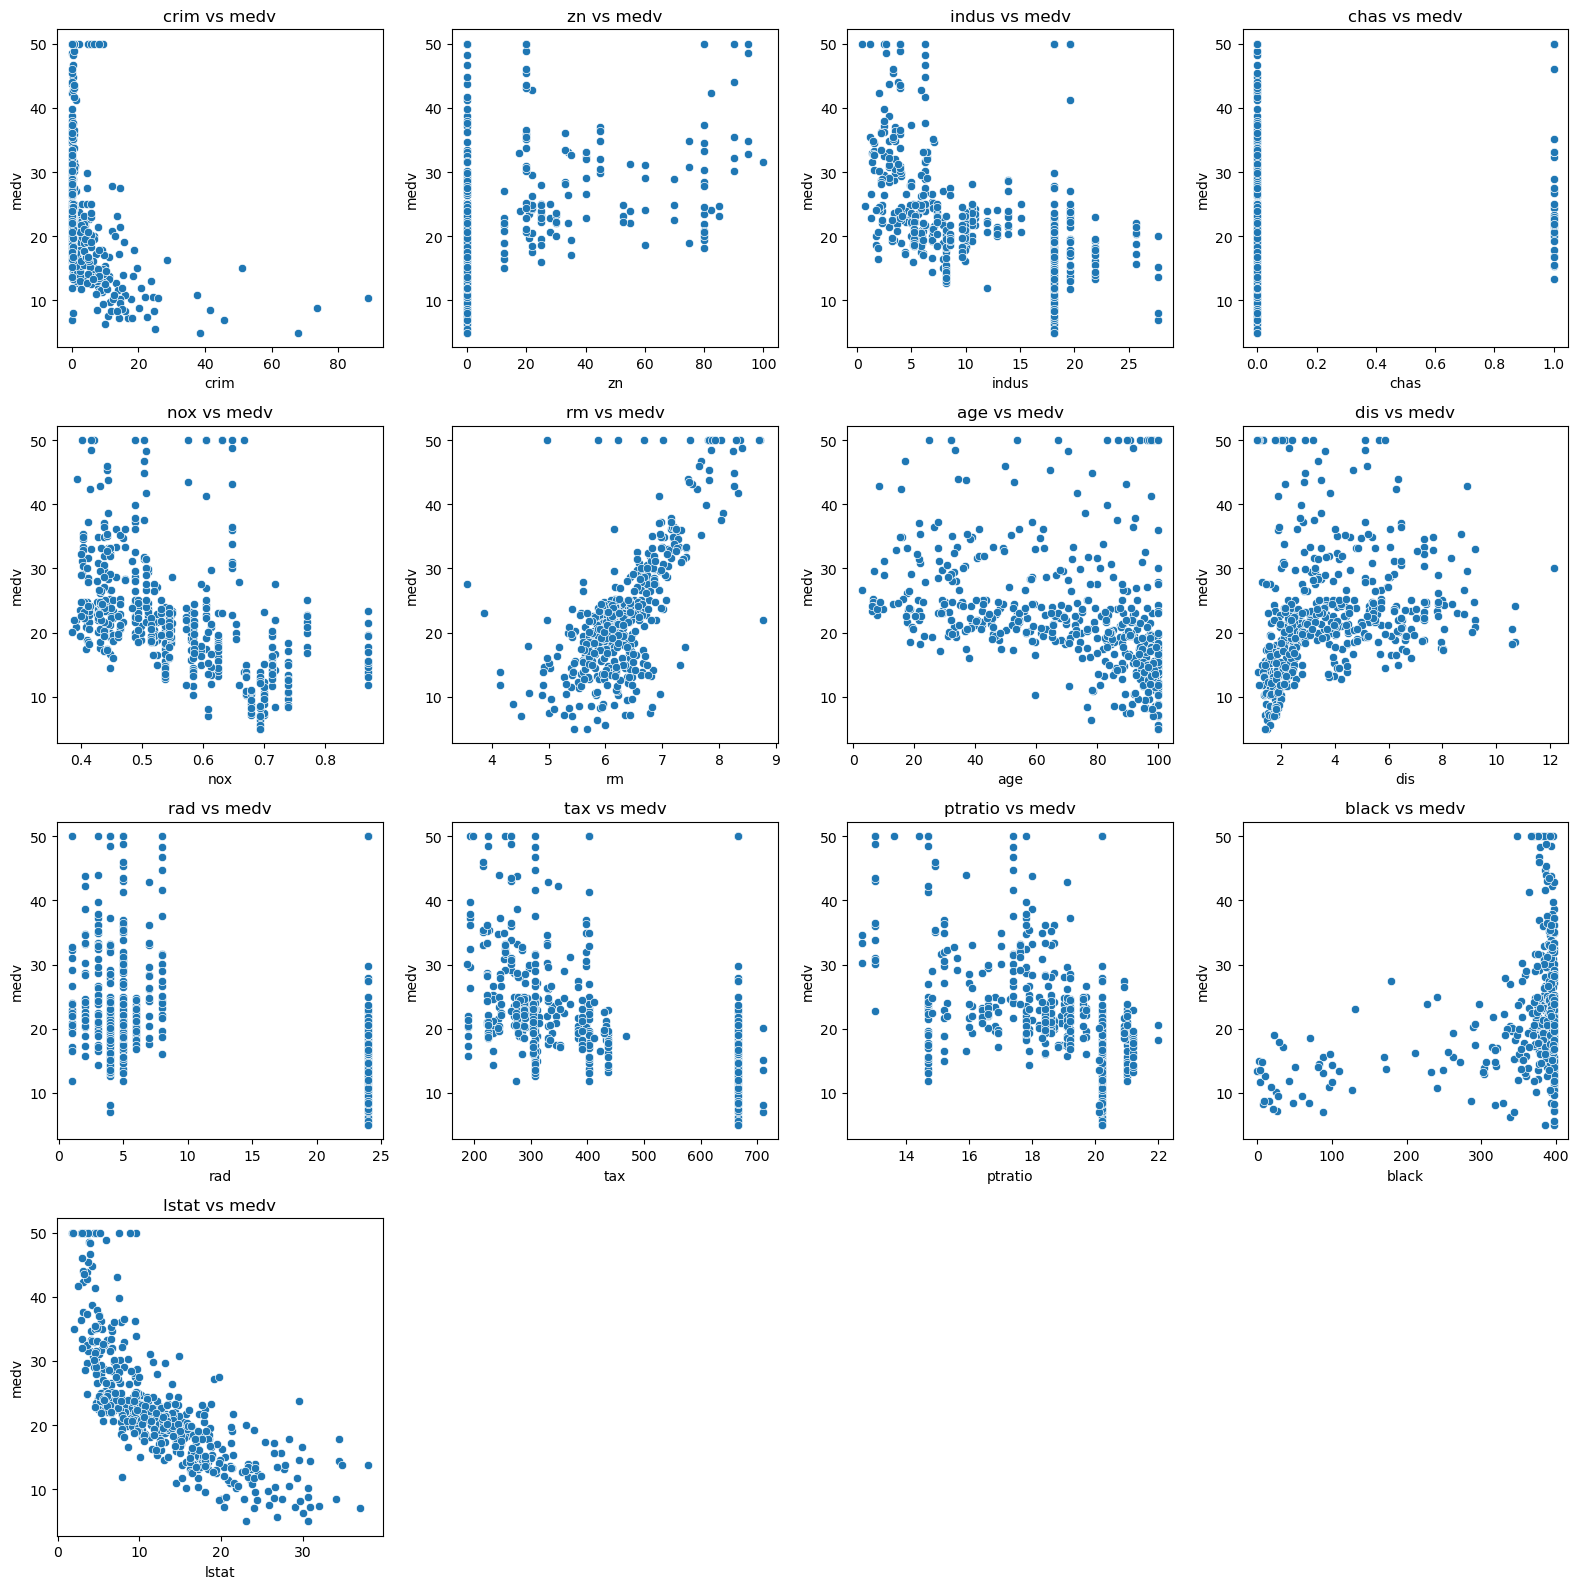

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la variable dependiente
target = 'medv'

# Eliminar la columna 'medv' del conjunto de variables independientes
features = [col for col in data.columns if col != target]

# Configuración de la gráfica
num_cols = 4  # Número de columnas en la cuadrícula
num_rows = (len(features) + num_cols - 1) // num_cols  # Calcular el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Recorrer cada variable independiente
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=data[feature], y=data[target], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs {target}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(target)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

lm = smf.ols(formula="medv~rm", data = data).fit()

lm.params

Intercept   -34.670621
rm            9.102109
dtype: float64

In [5]:
lm.pvalues

Intercept    6.950229e-34
rm           2.487229e-74
dtype: float64

In [6]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.49e-74
Time:                        21:48:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
prediccion = lm.predict(pd.DataFrame(data["rm"]))
prediccion

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [8]:
data["predicciones"] = -34.670621 + 9.102109*data["rm"]

data["RSE"] = (data["medv"]-data["predicciones"])**2

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predicciones,RSE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,1.382378
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,4.726367
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,15.776528
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,19.132420
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,33.847355


In [9]:
# Suma de los cuadrados de los residuos

SSD = sum(data["RSE"])
SSD

22061.879196211805

In [10]:
# Error estandard de la estimacion
import numpy as np

RSE = np.sqrt(SSD/len(data)-2)
RSE

6.449848972741112

In [11]:
sales_m = np.mean(data["medv"])
sales_m

22.532806324110677

In [12]:
# Error relativo
error = RSE/sales_m
error

0.2862425957941869

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

lm2 = smf.ols(formula="medv~rm+black", data = data).fit()

lm2.params

Intercept   -40.981101
rm            8.685555
black         0.025032
dtype: float64

In [14]:
lm2.pvalues

Intercept    1.485901e-45
rm           5.619743e-75
black        2.218033e-15
dtype: float64

In [15]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.47e-86
Time:                        21:48:07   Log-Likelihood:                -1641.4
No. Observations:                 506   AIC:                             3289.
Df Residuals:                     503   BIC:                             3302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.9811      2.608    -15.713      0.000     -46.105     -35.857
rm             8.6856      0.397     21.862      0.000       7.905       9.466
black          0.0250      0.003      8.187      0.000       0.019       0.031
==============================================================================
Omnibus:                      158.364   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1053.751
Skew:                           1.190   Prob(JB):                    1.52e-229
Kurtosis:                       9.657   Cond. No.                     3.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
prediccion2 = lm2.predict(data[["rm", "black"]])
prediccion2

0      26.061741
1      24.724166
2      31.258048
3      29.678908
4      31.029879
         ...    
501    26.095173
502    22.109813
503    29.544649
504    27.877516
505    21.328113
Length: 506, dtype: float64

In [17]:
data["prediccion2"] = prediccion2
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predicciones,RSE,prediccion2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,1.382378,26.061741
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,4.726367,24.724166
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,15.776528,31.258048
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,19.132420,29.678908
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,33.847355,31.029879


In [18]:
data["RSE2"] = (data["medv"]-prediccion2)**2

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predicciones,RSE,prediccion2,RSE2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,1.382378,26.061741,4.250776
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,4.726367,24.724166,9.760410
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,15.776528,31.258048,11.847031
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,19.132420,29.678908,13.846528
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,33.847355,31.029879,26.730154


In [19]:
# Eliminar las columnas que no deseas usar en la fórmula
features = data.drop(columns=['medv', 'predicciones', 'RSE', 'prediccion2', 'RSE2']).columns

# Construir la fórmula de manera dinámica
formula = f"medv ~ {' + '.join(features)}"

# Ajustar el modelo de regresión lineal
modelo = smf.ols(formula=formula, data=data).fit()

In [20]:
modelo.params

Intercept    36.459488
crim         -0.108011
zn            0.046420
indus         0.020559
chas          2.686734
nox         -17.766611
rm            3.809865
age           0.000692
dis          -1.475567
rad           0.306049
tax          -0.012335
ptratio      -0.952747
black         0.009312
lstat        -0.524758
dtype: float64

In [21]:
modelo.pvalues

Intercept    3.283438e-12
crim         1.086810e-03
zn           7.781097e-04
indus        7.382881e-01
chas         1.925030e-03
nox          4.245644e-06
rm           1.979441e-18
age          9.582293e-01
dis          6.013491e-13
rad          5.070529e-06
tax          1.111637e-03
ptratio      1.308835e-12
black        5.728592e-04
lstat        7.776912e-23
dtype: float64

In [23]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 May 2025   Prob (F-statistic):          6.72e-135
Time:                        21:48:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Realizar la predicción utilizando todas las columnas seleccionadas
prediccion_full = modelo.predict(data[features])

# Agregar la predicción al DataFrame
data['predicciones3'] = prediccion_full

# Visualizar las primeras filas para verificar las predicciones
print(data[['medv', 'predicciones3']].head())

   medv  predicciones3
0  24.0      30.003843
1  21.6      25.025562
2  34.7      30.567597
3  33.4      28.607036
4  36.2      27.943524


In [26]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,predicciones,RSE,prediccion2,RSE2,predicciones3
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.175746,1.382378,26.061741,4.250776,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.774021,4.726367,24.724166,9.760410,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.728032,15.776528,31.258048,11.847031,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.025938,19.132420,29.678908,13.846528,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.382152,33.847355,31.029879,26.730154,27.943524
